Baseline Logistic Regression Performance:

Accuracy: 0.9474
Precision: 1.0000
Recall: 0.8571
F1-Score: 0.9231


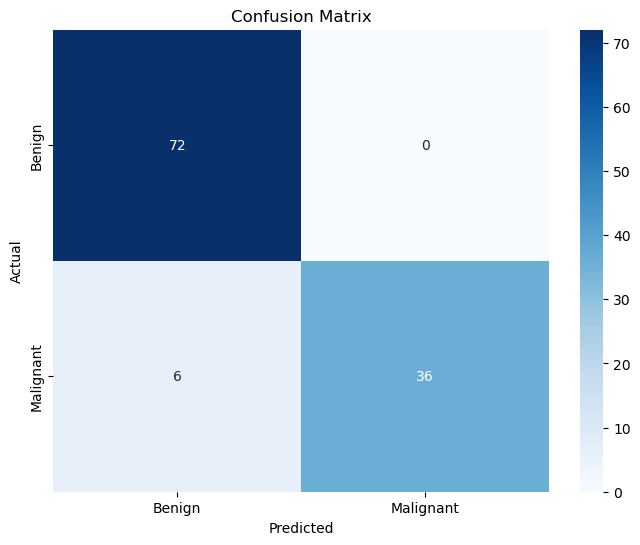


Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      1.00      0.96        72
   Malignant       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os






# Get the current working directory and construct project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Construct the path to the processed data
processed_data_path = os.path.join(project_root, 'data', 'processed', 'breast-cancer-selected-features.csv')

# Load the processed dataset
selected_data = pd.read_csv(processed_data_path)

# Ensure target is encoded as numeric
selected_data['diagnosis'] = selected_data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = selected_data.drop(columns=['diagnosis'])
y = selected_data['diagnosis']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Baseline Model: Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Baseline Logistic Regression Performance:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


Logistic Regression Performance:
Accuracy: 0.9474
Precision: 1.0000
Recall: 0.8571
F1-Score: 0.9231

Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      1.00      0.96        72
   Malignant       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



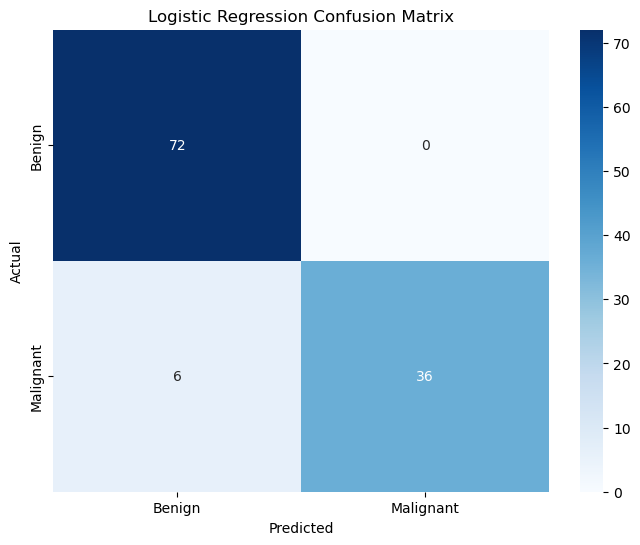


K-Nearest Neighbors Performance:
Accuracy: 0.9123
Precision: 0.9706
Recall: 0.7857
F1-Score: 0.8684

Classification Report:
              precision    recall  f1-score   support

      Benign       0.89      0.99      0.93        72
   Malignant       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



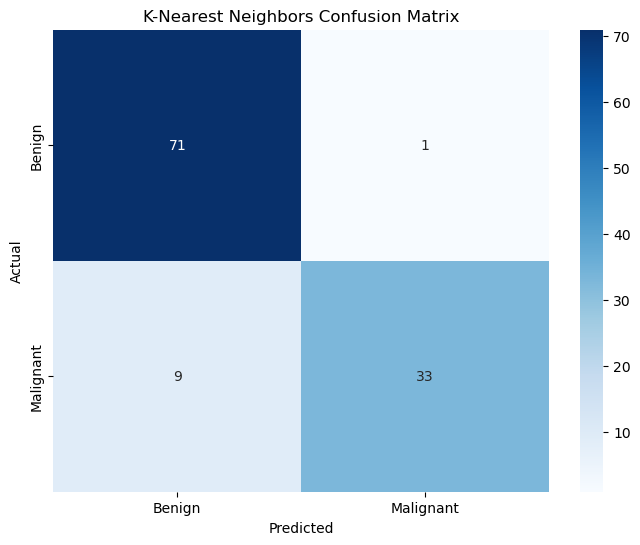


Decision Tree Performance:
Accuracy: 0.9298
Precision: 0.9250
Recall: 0.8810
F1-Score: 0.9024

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.96      0.95        72
   Malignant       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



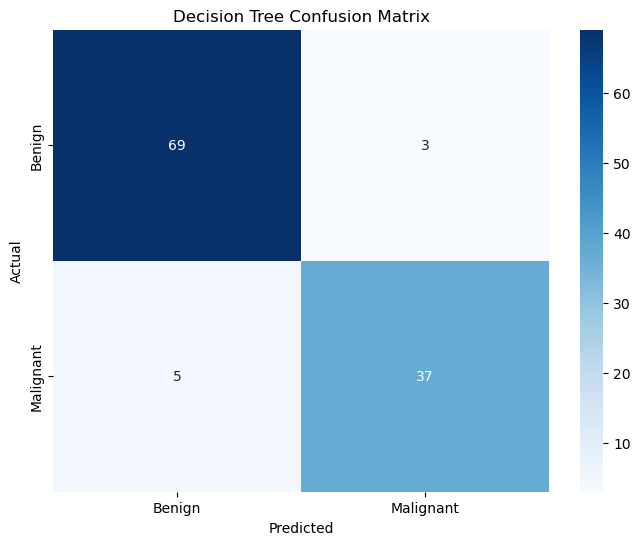


Naive Bayes Performance:
Accuracy: 0.9123
Precision: 0.9444
Recall: 0.8095
F1-Score: 0.8718

Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.97      0.93        72
   Malignant       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



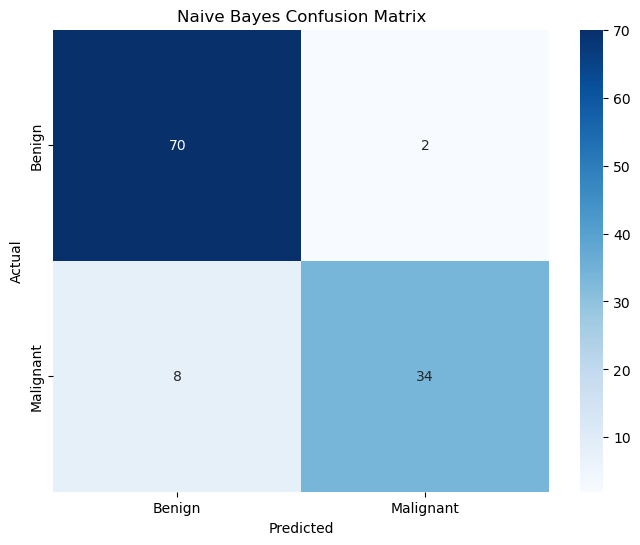


SVM (Full Feature Set) Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        72
           1       1.00      0.76      0.86        42

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



In [28]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to display metrics and classification report
def display_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
    return accuracy, precision, recall, f1

# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
display_metrics(y_test, lr_y_pred, "Logistic Regression")
plot_confusion_matrix(y_test, lr_y_pred, "Logistic Regression")

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
display_metrics(y_test, knn_y_pred, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, knn_y_pred, "K-Nearest Neighbors")

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
display_metrics(y_test, dt_y_pred, "Decision Tree")
plot_confusion_matrix(y_test, dt_y_pred, "Decision Tree")

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
display_metrics(y_test, nb_y_pred, "Naive Bayes")
plot_confusion_matrix(y_test, nb_y_pred, "Naive Bayes")

# Support Vector Machine
from sklearn.svm import SVC

# Train SVM on full feature set
svm_full_model = SVC(probability=True, random_state=42)
svm_full_model.fit(X_train, y_train)

# Evaluate SVM on full feature set
y_pred_svm_full = svm_full_model.predict(X_test)
print("\nSVM (Full Feature Set) Performance:")
print(classification_report(y_test, y_pred_svm_full))


Random Forest Performance:
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F1-Score: 0.9383

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



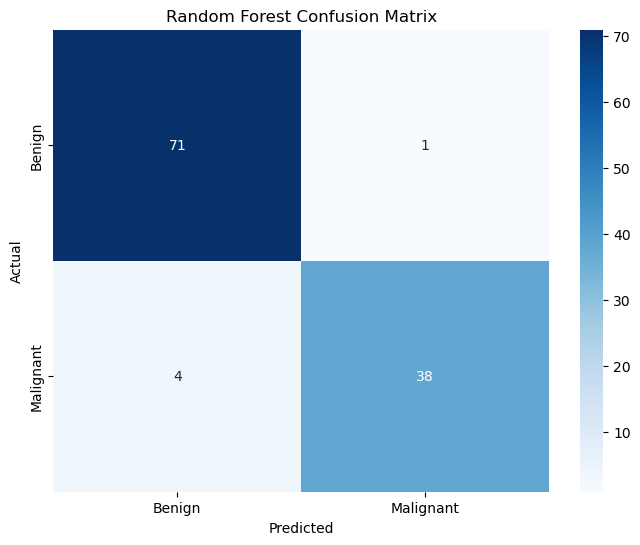


Gradient Boosting Performance:
Accuracy: 0.9474
Precision: 0.9737
Recall: 0.8810
F1-Score: 0.9250

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.99      0.96        72
   Malignant       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



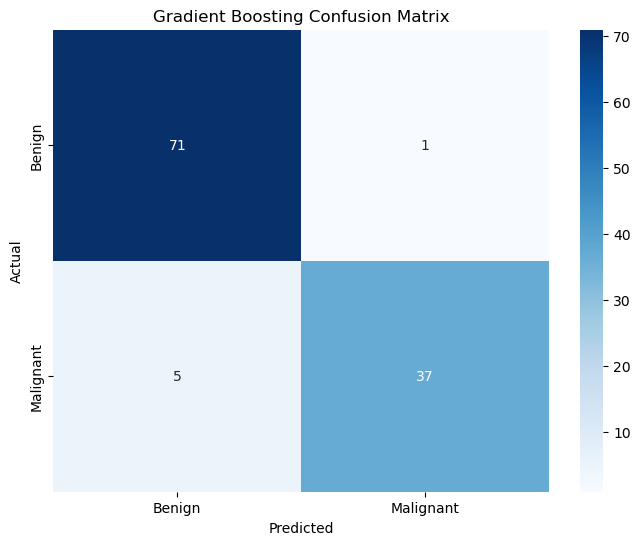


AdaBoost Performance:
Accuracy: 0.9474
Precision: 0.9737
Recall: 0.8810
F1-Score: 0.9250

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.99      0.96        72
   Malignant       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



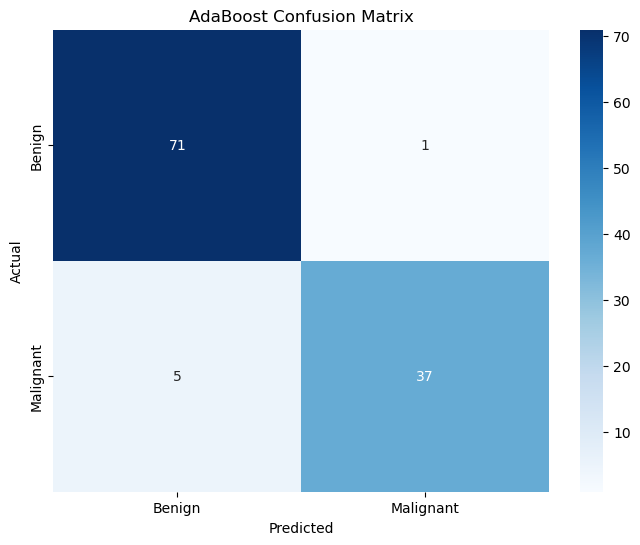

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
display_metrics(y_test, rf_y_pred, "Random Forest")
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest")

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
display_metrics(y_test, gb_y_pred, "Gradient Boosting")
plot_confusion_matrix(y_test, gb_y_pred, "Gradient Boosting")

# AdaBoost
ab_model = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
ab_model.fit(X_train, y_train)
ab_y_pred = ab_model.predict(X_test)
display_metrics(y_test, ab_y_pred, "AdaBoost")
plot_confusion_matrix(y_test, ab_y_pred, "AdaBoost")

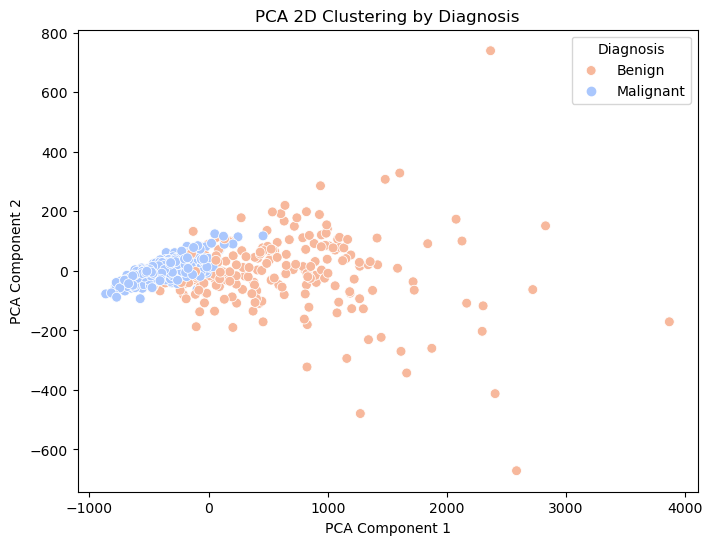

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Plot 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="coolwarm", s=50)
plt.title("PCA 2D Clustering by Diagnosis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()

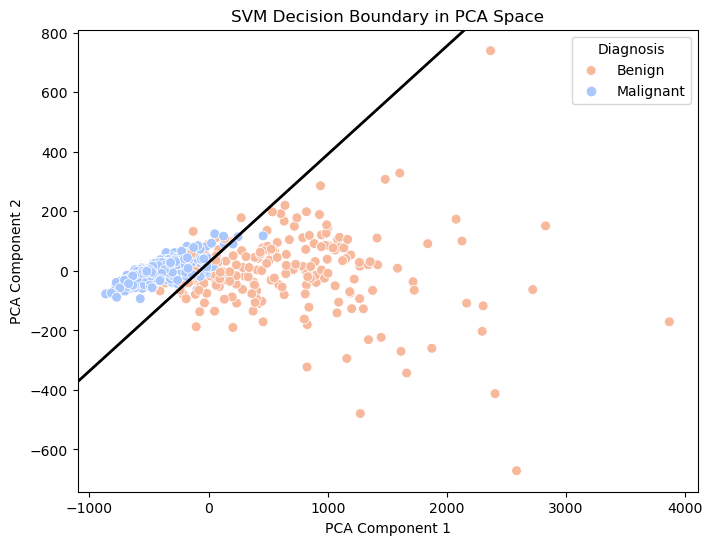

In [19]:
from sklearn.svm import SVC
import numpy as np

# Fit SVM on 2D PCA-transformed dataset
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_pca_2d, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="coolwarm", s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

# Get decision boundary
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the boundary and margin
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.title("SVM Decision Boundary in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()

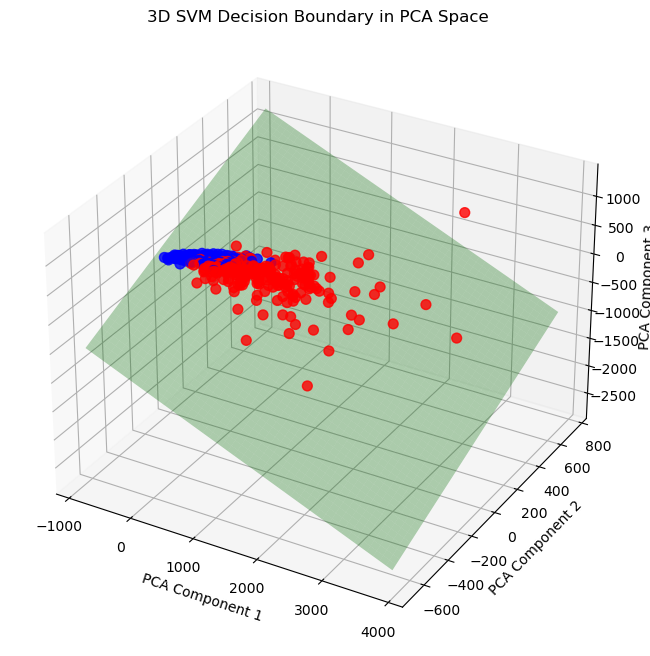

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA for 3D reduction
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Train SVM on PCA-reduced 3D data
svm_model_pca_3d = SVC(kernel='linear', random_state=42)
svm_model_pca_3d.fit(X_pca_3d, y)

# Create a grid of points to evaluate the decision boundary
xlim = (X_pca_3d[:, 0].min(), X_pca_3d[:, 0].max())
ylim = (X_pca_3d[:, 1].min(), X_pca_3d[:, 1].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Calculate the decision boundary
w = svm_model_pca_3d.coef_[0]  # SVM coefficients
b = svm_model_pca_3d.intercept_[0]  # SVM intercept
z = -(w[0] * xx + w[1] * yy + b) / w[2]  # Solve for z (plane equation)

# Plot the 3D scatter plot with the decision boundary
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
colors = ['blue' if label == 0 else 'red' for label in y]
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=colors, s=50, alpha=0.8)

# Plot the decision boundary
ax.plot_surface(xx, yy, z, alpha=0.3, color='green')

# Set labels and title
ax.set_title('3D SVM Decision Boundary in PCA Space')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize a dictionary to store model performances
model_performance = []

# Models dictionary
models = {
    "K-Nearest Neighbors": knn_model,
    "Decision Tree": dt_model,
    "Naive Bayes": nb_model,
    "Support Vector Machine (PCA)": svm_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "AdaBoost": ab_model
}

# Testing dataset for SVM
X_test_svm = X_test_pca  # Use PCA-transformed test set for SVM

# Evaluate each model
for model_name, model in models.items():
    # Use PCA-transformed data for SVM
    if "SVM" in model_name:
        y_pred = model.predict(X_test_svm)
    else:
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metrics to the performance list
    model_performance.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convert performance list to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the DataFrame
print("\nModel Performance Summary:")
print(performance_df)

# Visualization: Heatmap for Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

NameError: name 'X_test_pca' is not defined